#Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Loading the data

In [ ]:
train_df  = pd.read_csv('train.tsv',sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')


In [ ]:
train_df.shape

(30000, 6)

In [ ]:
test_df.shape

(8267, 6)

#Data Preview

In [ ]:
train_df.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


In [ ]:
test_df.head()

,Unnamed: 0,title,text,subject,date,label
0,8104,Conservatives Will HATE What Donald Trump Just...,Donald Trump isn t exactly a stranger to makin...,News,"February 14, 2016",0
1,7467,Trump victory may create new tension between U...,Donald Trump’s U.S. election victory may creat...,politicsNews,"November 9, 2016",1
2,9473,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,"Nov 9, 2017",0
3,276,"Democratic Senator Franken to resign: CNN, cit...",U.S. Democratic Senator Al Franken will announ...,politicsNews,"December 7, 2017",1
4,19274,GANG OF DOMESTIC TERRORISTS Violently Attack L...,***WARNING*** Violence is graphic***This Trump...,left-news,"Jan 21, 2017",0


In [ ]:
train_df.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'], dtype='object')

#Feature Engineering

['Unnamed: 0', 'title', 'subject', 'date'] these columns are not required for detecting the fake news and thus dropped from the dataset.

In [ ]:
train_df=train_df.drop(columns=['Unnamed: 0','title','subject','date'])

Checking the missing values

In [ ]:
train_df.isnull().sum()

,0
text,0
label,0


#Text Preprocessing

The preprocess function cleans a text by converting it to lowercase, removing text in square brackets, non-word characters, URLs, HTML tags, punctuation, and words containing numbers.

In [ ]:
def preprocess(text):
    text = text.lower()#convert to lowercase
    text = re.sub('\[.*?\]','',text)#Remove Text in Square Brackets
    text = re.sub("\\W"," ",text)#Remove Non-Word Characters
    text = re.sub('https?://\S+|www\.\S+','',text)#Remove URLs
    text = re.sub('<.*?>+',b'',text)#Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)#Remove Punctuation
    text = re.sub('\w*\d\w*','',text)#Remove Words Containing Numbers
    return text

In [ ]:
train_df['text'] = train_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)

Defining dependent and independent variable as x and y

In [ ]:
#for training data
x=train_df['text']
y=train_df['label']
#for testing data
X=test_df['text']
Y=test_df['label']


#Training the model

Splitting the dataset into training set and validation set.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,random_state=42)


In [ ]:
x_train.shape

(22500,)

In [ ]:
x_val.shape

(7500,)

#Extracting Features from the Text
Convert text to vectors using Text frequency- Inverse Document frequency method(Tfidf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer()
xv_train = vc.fit_transform(x_train)
xv_val = vc.transform(x_val)
xv_test = vc.transform(X)

#Logistic Regression

Validation Accuracy and Report:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(xv_train, y_train)

# Predict on the validation set
lr_pred = lr.predict(xv_val)

# Calculate and print validation accuracy
print(f"Validation Accuracy: {lr.score(xv_val, y_val):.2f}")

# Print the classification report for the validation set
print(classification_report(y_val, lr_pred))


Validation Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3930
           1       0.97      0.98      0.98      3570

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500



Testing Accuracy and Report:

In [ ]:
# Predict on the testing set
lr_pred_test = lr.predict(xv_test)

# Calculate and print testing accuracy
print(f"testing Accuracy: {lr.score(xv_test, Y):.2f}")

# Print the classification report for the testing set
print(classification_report(Y, lr_pred_test))

testing Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4284
           1       0.97      0.98      0.98      3983

    accuracy                           0.98      8267
   macro avg       0.98      0.98      0.98      8267
weighted avg       0.98      0.98      0.98      8267



Training Accuracy & report:

In [ ]:
training_accuracy = lr.score(xv_train, y_train)
print(f"Training Accuracy: {training_accuracy:.2f}")


Training Accuracy: 0.99


Since the validation and testing accuracies are very similar and both are high, there is no indication of overfitting in this case.

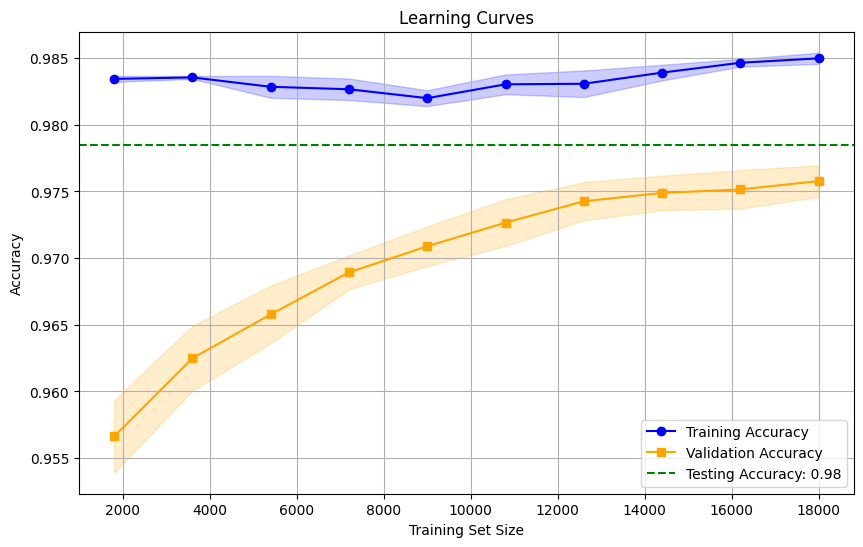

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),  # Sizes from 10% to 100% of the training data
        n_jobs=-1
    )

    # Calculate mean and standard deviation of training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(validation_scores, axis=1)
    val_std = np.std(validation_scores, axis=1)

    # Test score
    test_accuracy = model.score(X_test, y_test)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange', marker='s')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)
    plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Testing Accuracy: {test_accuracy:.2f}')

    # Plot labels and title
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Example usage with the LogisticRegression model
plot_learning_curves(lr, xv_train, y_train, xv_test, Y)


#Decision Tree Classifier

Testing and Validation Accuracy & report:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)
dt_pred = dt.predict(xv_val)
print(f"Validation Accuracy: {dt.score(xv_val, y_val):.2f}")
print(classification_report(y_val,dt_pred))

# Predict on the testing set
dt_pred_test = dt.predict(xv_test)

# Calculate and print testing accuracy
print(f"testing Accuracy: {dt.score(xv_test, Y):.2f}")

# Print the classification report for the testing set
print(classification_report(Y, dt_pred_test))

Validation Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3930
           1       0.94      0.93      0.94      3570

    accuracy                           0.94      7500
   macro avg       0.94      0.94      0.94      7500
weighted avg       0.94      0.94      0.94      7500

testing Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4284
           1       0.95      0.93      0.94      3983

    accuracy                           0.94      8267
   macro avg       0.94      0.94      0.94      8267
weighted avg       0.94      0.94      0.94      8267



#Gradient Boost Classifier

Testing and Validation Accuracy & report:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42)
gb.fit(xv_train, y_train)
gb_pred = gb.predict(xv_val)
print(f"Validation Accuracy: {gb.score(xv_val, y_val):.2f}")
print(classification_report(y_val,gb_pred))

# Predict on the testing set
gb_pred_test = gb.predict(xv_test)

# Calculate and print testing accuracy
print(f"testing Accuracy: {gb.score(xv_test, Y):.2f}")

# Print the classification report for the testing set
print(classification_report(Y, gb_pred_test))

Validation Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3930
           1       0.96      0.97      0.97      3570

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500

testing Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4284
           1       0.96      0.98      0.97      3983

    accuracy                           0.97      8267
   macro avg       0.97      0.97      0.97      8267
weighted avg       0.97      0.97      0.97      8267



#Random Forest Classifier

Testing and Validation Accuracy & report:

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(xv_train, y_train)
rf_pred = rf.predict(xv_val)
print(f"Validation Accuracy: {rf.score(xv_val, y_val):.2f}")
print(classification_report(y_val,rf_pred))

# Predict on the testing set
rf_pred_test = rf.predict(xv_test)

# Calculate and print testing accuracy
print(f"testing Accuracy: {rf.score(xv_test, Y):.2f}")

# Print the classification report for the testing set
print(classification_report(Y, rf_pred_test))


Validation Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3930
           1       0.97      0.97      0.97      3570

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500

testing Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4284
           1       0.97      0.97      0.97      3983

    accuracy                           0.97      8267
   macro avg       0.97      0.97      0.97      8267
weighted avg       0.97      0.97      0.97      8267



#XGBClassifier

Testing and Validation Accuracy & report:

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xv_train,y_train)
xgb_pred = xgb.predict(xv_val)
print(f"Validation Accuracy: {xgb.score(xv_val, y_val):.2f}")
print(classification_report(y_val,xgb_pred))

# Predict on the testing set
xgb_pred_test = xgb.predict(xv_test)

# Calculate and print testing accuracy
print(f"testing Accuracy: {xgb.score(xv_test, Y):.2f}")

# Print the classification report for the testing set
print(classification_report(Y, xgb_pred_test))

Validation Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3930
           1       0.99      0.99      0.99      3570

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500

testing Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      3983

    accuracy                           0.99      8267
   macro avg       0.99      0.99      0.99      8267
weighted avg       0.99      0.99      0.99      8267



###Since Validation accuracy and Testing accuracy are both almost the same and extremely high, it indicates that Model is generalizing well and is not Overfitting.



###Since the XGBClassifier is performing well on the dataset and making accurate predictions with high accuracy, the XGBClassifier algorithm is the most suitable for this classification project.

#AUC-ROC curve

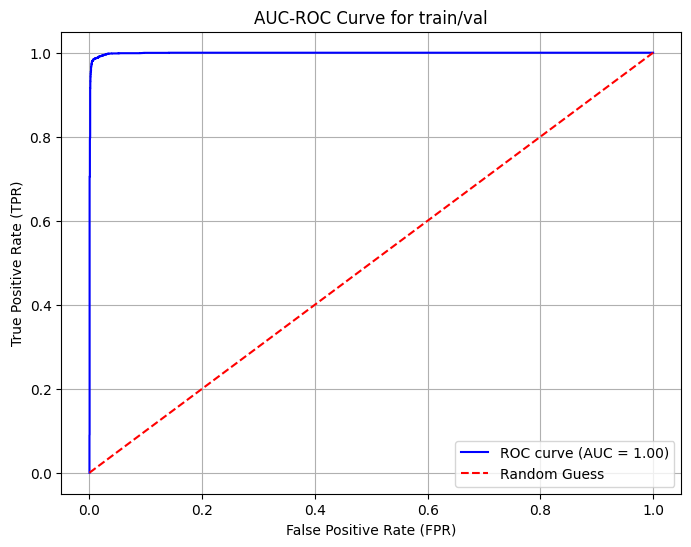

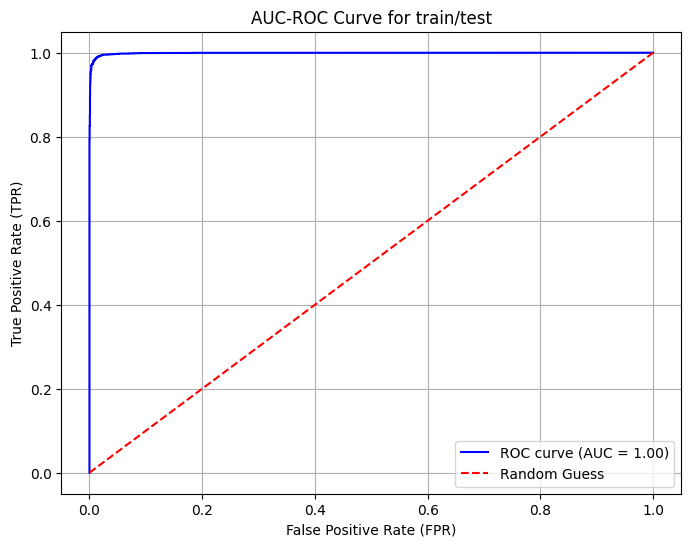

In [ ]:
# Required imports for the AUC-ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming xv_train, xv_test, y_train, Y, and XGBClassifier model are already defined
# Calculate probabilities for the positive class
y_probs_val = xgb.predict_proba(xv_val)[:, 1]  # Probabilities for class 1
y_probs = xgb.predict_proba(xv_test)[:, 1]  # Probabilities for class 1

# Calculate ROC metrics for val
fpr, tpr, thresholds = roc_curve(y_val, y_probs_val)
auc_score = roc_auc_score(y_val, y_probs_val)
# Calculate ROC metrics for test
fpr1, tpr1, thresholds1 = roc_curve(Y, y_probs)
auc_score1 = roc_auc_score(Y, y_probs)

# Plot the ROC curve for val
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve for train/val')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# Plot the ROC curve for test
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'ROC curve (AUC = {auc_score1:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve for train/test')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The model in this case is perfectly classifying the data with no overlap between the classes.

#Model Testing

In [ ]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"

def testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(preprocess)
    new_x_test = new_def_test["text"]
    new_xv_test = vc.transform(new_x_test)
    pred_XGB = xgb.predict(new_xv_test)

    return print("\nXGB Prediction: {}".format(output_lable(pred_XGB[0])))

##Model Testing With Manual Entry

In [ ]:
news = str(input())
testing(news)

Before entering politics, Manmohan Singh was an economist. In 1991, when India’s economy was struggling, Prime Minister Narasimha Rao sought someone outside of politics with economic expertise to handle the crisis. This led to Manmohan Singh being appointed as the Finance Minister, despite having no prior political experience. Being new to politics, Singh was sensitive to criticism. In 1992, when he presented his first budget, opposition leader Atal Bihari Vajpayee heavily criticized it. As a skilled orator, Vajpayee’s words deeply affected Singh. His sensitive, non-political nature made him vulnerable to such attacks, and he was so distressed that he contemplated resigning. This episode highlighted Singh’s emotional response to political criticism, which he was not accustomed to handling.

XGB Prediction: Real News


#Classifying Fake-Real News and Saving it in '.txt' format.

In [ ]:
import pandas as pd
import json

# Function to classify and save results into a .txt file
def classify_and_save(input_data, model, vectorizer, output_filename="result.txt"):
    # Preprocess the input text
    input_data["text"] = input_data["text"].apply(preprocess)

    # Transform the text data using the same vectorizer used during training
    input_features = vectorizer.transform(input_data["text"])  # Convert to array to match the model input format

    # Predict using the trained model
    predictions = model.predict(input_features)

    # Map predictions to labels (0 -> Fake News, 1 -> Real News)
    input_data["label"] = ["1" if pred == 1 else "0" for pred in predictions]

    # Save the result in a structured format
    result_data = {"results": []}
    for index, row in input_data.iterrows():
        result_data["results"].append([row["text"], row["label"]])

    # Write the results to a text file
    with open(output_filename, 'w') as file:
        json.dump(result_data, file, indent=4)

    print(f"Results saved in {output_filename}")




Results saved in result.txt


##Testing on your dataset

In [ ]:

#use this ---->>>
# test_data = read_csv('file_path',sep='\t')
# classify_and_save(test_data['text'], xgb, vc, output_filename="result.txt")

# Demo
test_data = pd.DataFrame({
    "text": [
        "Before entering politics, Manmohan Singh was an economist. In 1991, when India’s economy was struggling, Prime Minister Narasimha Rao sought someone outside of politics with economic expertise to handle the crisis. This led to Manmohan Singh being appointed as the Finance Minister, despite having no prior political experience. Being new to politics, Singh was sensitive to criticism. In 1992, when he presented his first budget, opposition leader Atal Bihari Vajpayee heavily criticized it. As a skilled orator, Vajpayee’s words deeply affected Singh. His sensitive, non-political nature made him vulnerable to such attacks, and he was so distressed that he contemplated resigning. This episode highlighted Singh’s emotional response to political criticism, which he was not accustomed to handling.",
        "Nepal bombed Nagasaki in 1947",
        "In the past ten years, the BJP government has left no stone unturned in castigating Punjab, Punjabis and Punjabiyat.750 farmers, mostly belonging to Punjab, were martyred while incessantly waiting at Delhi borders, for months together. As if the lathis and the rubber bullets were not enough, none less than the Prime Minister verbally assaulted our farmers by calling them Andolanjeevis and Parjeevi (Parasites) on the floor of the Parliament.Their only demand was the withdrawal of the three farm laws imposed on them without consulting them."
    ]
})
classify_and_save(test_data, xgb, vc, output_filename="result.txt")